# CS4168 Data Mining Group Project

Group Members:

*   Colin Kelleher - 21160562
*   Ewen Madec - 	21160589

***Deadline: Sunday, 24th of April, 23:55***


---


**Work Completed by Colin:**


*   Notebook Setup and Layout
*   EDA: General
*   EDA: Missing Values
*   EDA: Discussion
*   Splitting the Dataset 
*   Encoding
*   Data Preparation
*   SVM
*   KNN



---

**Work Completed by Ewen:**
*   Encoding
*   Clustering
*   Random Forest
*   Gaussian Naive Bayes
*   Classifier comparison

---

**Dataset**

mushroom_sample.csv

### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import manifold, cluster, preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

### Load the Dataset

In [ ]:
df = pd.read_csv("./mushrooms_sample.csv")

## **Exploratory Data Analysis**

In [ ]:
# Column names, counts, and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 4000 non-null   object
 1   cap-surface               4000 non-null   object
 2   cap-color                 4000 non-null   object
 3   bruises%3F                4000 non-null   object
 4   odor                      4000 non-null   object
 5   gill-attachment           4000 non-null   object
 6   gill-spacing              4000 non-null   object
 7   gill-size                 4000 non-null   object
 8   gill-color                4000 non-null   object
 9   stalk-shape               4000 non-null   object
 10  stalk-root                2770 non-null   object
 11  stalk-surface-above-ring  4000 non-null   object
 12  stalk-surface-below-ring  4000 non-null   object
 13  stalk-color-above-ring    4000 non-null   object
 14  stalk-color-below-ring  

From the above, we can wee that there are 4000 entries in the dataset.

We can see that ```stalk-root``` only has 2770 entries, so this will require some further investigation



From the below, we can see that mushrooms can be classified as either `e` for edible or `p` for poisonous

In [ ]:
df['class'].unique()

array(['e', 'p'], dtype=object)

In [ ]:
df['class'].value_counts()

e    2000
p    2000
Name: class, dtype: int64

In [ ]:
df["class"] = [1 if i == "p" else 0 for i in df["class"]]

1 = Poisonous

0 = Edible

In [ ]:
df['class'].value_counts()

0    2000
1    2000
Name: class, dtype: int64

We will now look at the first and last 3 rows of the dataset to get a feel for the types of values in each column

In [ ]:
df.head(3)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,t,n,f,c,b,u,t,...,p,g,p,w,o,p,k,v,d,0
1,f,y,g,t,n,f,c,b,u,t,...,w,g,p,w,o,p,k,v,d,0
2,x,s,p,t,n,f,c,b,w,e,...,w,e,p,w,t,e,w,c,w,0


In [ ]:
df.tail(3)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3997,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,m,1
3998,f,y,e,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,l,1
3999,f,s,n,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,1


Summary of the dataset

In [ ]:
df.describe()

,class
count,4000.000000
mean,0.500000
std,0.500063
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


### **Missing Values**

Checking for null values

In [ ]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

We will now examine `stalk-root` which has about 31% missing values

In [ ]:
df['stalk-root'].value_counts()

b    1868
e     545
c     266
r      91
Name: stalk-root, dtype: int64

Impute the missing values using the `SimpleImputer` with the `most_frequent` strategy 

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df['stalk-root'] = imp.fit_transform(df['stalk-root'].values.reshape(-1,1))[:,0]

In [ ]:
df['stalk-root'].value_counts()

b    3098
e     545
c     266
r      91
Name: stalk-root, dtype: int64

We can now see that there are no more missing values in `stalk-root`

In [ ]:
df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

### **Discussion of findings from Exploratory Data Analysis**

The first step in our exploration of the dataset was using ``df.info()`` to have an overview of the datas, looking at datatypes, the number of values etc. 

Once we had a general feel for the dataset, we looked at the ``class`` labels we would be predicting. Class labels for `e` and `p` so we converted them to `0` and `1`.

W used some other tools such as ``head``, ``tail`` and ``describe`` to examine the dataset further. 

We identified that ``stalk-root`` has 1230 missing values (about 31%). We used the ``SimpleImputer`` with the ``most_frequent`` strategy to impute these missing values 

## **Encoding**

ML Models will only accept numerical data and this dataset is composed of non-numerical values so here I use LabelEncoding to convert the non-numeric data into numeric data

In [ ]:
df_copy = df.copy()

###Option 1 : use LabelEncoder

In [ ]:
labelenc= LabelEncoder()
df[['cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',"stalk-surface-above-ring",'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color', 'population','habitat']] = df[['cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',"stalk-surface-above-ring",'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color', 'population','habitat']].apply(labelenc.fit_transform)
df.head(3)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,0,2,1,5,1,0,0,9,1,...,6,3,0,2,1,4,2,4,0,0
1,2,3,3,1,5,1,0,0,9,1,...,7,3,0,2,1,4,2,4,0,0
2,5,2,5,1,5,1,0,0,10,0,...,7,2,0,2,2,0,7,1,6,0


###Option 2 : one-hot encode all categorical columns

In [ ]:
df2 = pd.get_dummies(df_copy, drop_first=True)
df2.head(3)

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### **Discussion of Encoding and Splitting**

In option1, we have used the ``LabelEncoder`` and it can be seen that the shape of the dataset is still 23 columns, versus option 2 where we used the ``one hot encoder`` which changed the shape of the dataset to have 95 columns

## **K-means clustering**

###Applying Silhouette method to find the optimal value for k :

Using LabelEncoder (option 1) :

In [ ]:
best_sil_coeff = 0
best_n_cluster = 0
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    if sil_coeff > best_sil_coeff:
        best_sil_coeff = sil_coeff
        best_n_cluster = n_cluster
print("LabelEncoder : best results for n_clusters={}, The Silhouette Coefficient is {}".format(best_n_cluster, best_sil_coeff))

LabelEncoder : best results for n_clusters=2, The Silhouette Coefficient is 0.2836190317210435


Using One-hot-encoding (option 2):

In [ ]:
best_sil_coeff = 0
best_n_cluster = 0
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster).fit(df2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df2, label, metric='euclidean')
    if sil_coeff > best_sil_coeff:
        best_sil_coeff = sil_coeff
        best_n_cluster = n_cluster
print("One-hot-encoding : best results for n_clusters={}, The Silhouette Coefficient is {}".format(best_n_cluster, best_sil_coeff))

One-hot-encoding : best results for n_clusters=7, The Silhouette Coefficient is 0.23596199956673383


###Applying Elbow method to find the optimal value for k :

Using LabelEncoder (option 1) :

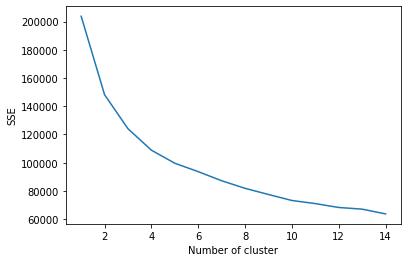

In [ ]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
     
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Using One-hot-encoding (option 2):

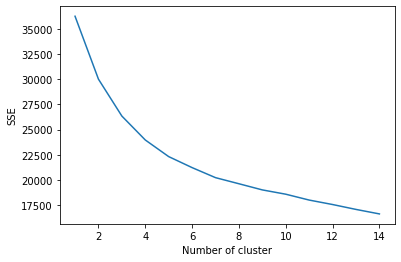

In [ ]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2)
     
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
k1 = 2  # k value for option 1 : dataFrame using LabelEncoder
k2 = 7  # k value for option 2 : dataFrame using one-hot-encoding

Scatterplot Function (to be used below for visualising a clustering)

In [ ]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [ ]:
data = np.array(df.values, dtype=float)
data2 = np.array(df2.values, dtype=float)

Here we rescale the values in each column to the interval [0,1] with MinMaxScaler :

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)
data2 = min_max_scaler.fit_transform(data2)

k-means clustering method :

In [ ]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k1, n_init=10, max_iter=300).fit(data)
clustered_data_sklearn2 = cluster.KMeans(n_clusters=k2, n_init=10, max_iter=300).fit(data2)

###Apply various manifold-learning techniques to project the data set to a 2D space (we plot clustering for the two encoding to see the differences)

Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space :

In [ ]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]
data_and_centers2 = np.r_[data2,clustered_data_sklearn2.cluster_centers_]

In [ ]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
XYcoordinates2 = manifold.MDS(n_components=2).fit_transform(data_and_centers2)
print("transformation complete")

transformation complete


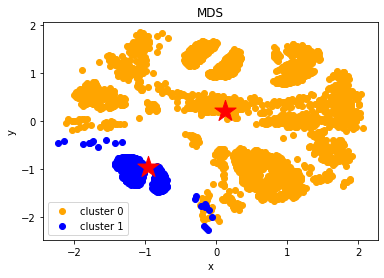

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k1,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k1:,:], 
                       title='MDS')


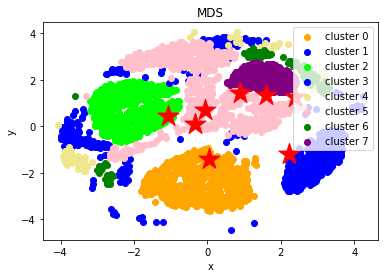

In [ ]:
clustering_scatterplot(points=XYcoordinates2[:-k2,:], 
                       labels=clustered_data_sklearn2.labels_, 
                       centers=XYcoordinates2[-k2:,:], 
                       title='MDS')

Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
XYcoordinates2 = manifold.TSNE(n_components=2).fit_transform(data_and_centers2)

print("transformation complete")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


transformation complete


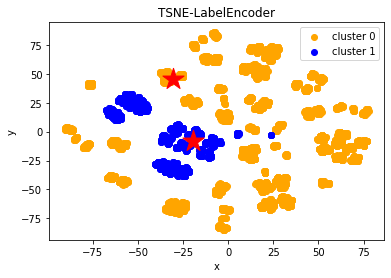

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k1,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k1:,:], 
                       title='TSNE-LabelEncoder')


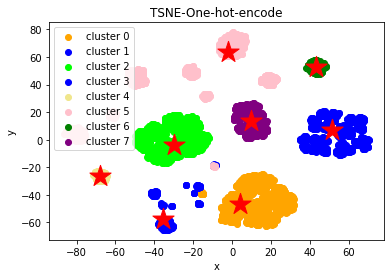

In [ ]:
clustering_scatterplot(points=XYcoordinates2[:-k2,:], 
                       labels=clustered_data_sklearn2.labels_,
                       centers=XYcoordinates2[-k2:,:], 
                       title='TSNE-One-hot-encode')

Apply Isometric Mapping(Isomap) to project both the data and the k-Means cluster centers to a 2D space :

In [ ]:
XYcoordinates = Isomap(n_components=2).fit_transform(data_and_centers)
XYcoordinates2 = Isomap(n_components=2).fit_transform(data_and_centers2)
print("transformation complete")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_

transformation complete


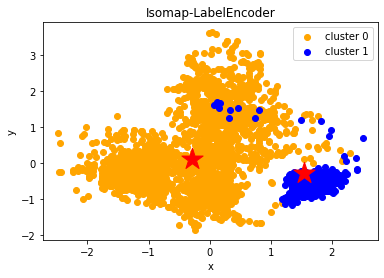

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k1,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k1:,:], 
                       title='Isomap-LabelEncoder')


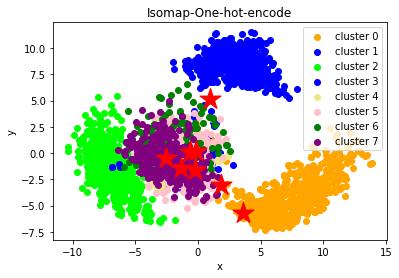

In [ ]:
clustering_scatterplot(points=XYcoordinates2[:-k2,:], 
                       labels=clustered_data_sklearn2.labels_, 
                       centers=XYcoordinates2[-k2:,:], 
                       title='Isomap-One-hot-encode')


In [ ]:
XYcoordinates = SpectralEmbedding(n_components=2).fit_transform(data_and_centers)
XYcoordinates2 = SpectralEmbedding(n_components=2).fit_transform(data_and_centers2)
print("transformation complete")

transformation complete


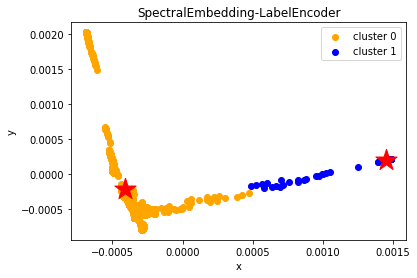

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k1,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k1:,:], 
                       title='SpectralEmbedding-LabelEncoder')


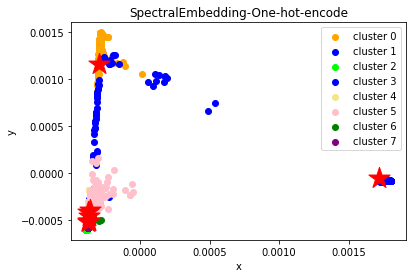

In [ ]:
clustering_scatterplot(points=XYcoordinates2[:-k2,:], 
                       labels=clustered_data_sklearn2.labels_, 
                       centers=XYcoordinates2[-k2:,:], 
                       title='SpectralEmbedding-One-hot-encode')


### **Discussion on Clustering**

We applied Silhouette method and Elbow methods for both way of encoding the dataset (1. LabelEncoder, 2. One-hot-encoding) as part of k-means clustering. We picked k1 = 2 and k2 = 7 and then we applied various techniques to project k-means cluster centers to a 2D space. We appplied various manifold techniques (MDS, t-SNE, IsoMap, Spectral Embedding) and only t-SNE gave interesting results in terms of clusters. 
Using t-SNE to project, we can observe that there are lots of small clusters when using the LabelEncoder and less numerous bigger clusters when using one-hot-encoding. We can assume that the mushrooms which are classified in two main classes could be in fact divided in many smaller subclasses as seen on the projection. It could be mushroom sub-species from two main species for example.

## **Data Preparation**

In [ ]:
names_all = [c for c in df if c not in ['class']]

names_outliers = []
names_no_outliers = list(set(names_all) - set(names_outliers))

In [ ]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [ ]:
features = ['cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',"stalk-surface-above-ring",'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color', 'population','habitat']

### **Split the Data**

In [ ]:
y = df['class']
X = df.drop('class', axis=1).values

dev_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, stratify=y)

In [ ]:
preprocess_pipeline = make_pipeline(
  ColumnTransformer([
        ("scaler", StandardScaler(), features)],
        remainder="passthrough")
)

In [ ]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[features]
test_X = test_df[features]

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
label_encoder.fit(df["class"])
dev_y = label_encoder.transform(dev_df["class"])
test_y = label_encoder.transform(test_df["class"])


## **Predictive Modelling**

### **Support Vector Machine - SVM**

In [ ]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('svm', svm.SVC(probability=True))])

param_grid = {
    'svm__C': [0.1,0.2,1,2,10,20],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(dev_X, dev_y)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

search1 = GridSearchCV(pipe, param_grid, n_jobs=-1, scoring="accuracy",cv=5, refit=True)
print("Best Accuracy score = %0.3f:" % search.best_score_)

SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

Best CV score = 1.000:
Best parameters:  {'svm__C': 0.2, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Best Accuracy score = 1.000:


### KNN

In [ ]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, random_state=2)
knn = Pipeline([
    ("preprocessor", preprocess_pipeline),
    ("predictor", KNeighborsClassifier())])

param_grid = {"predictor__n_neighbors": [1, 2, 5,10,11,15,20,25],
                  'predictor__weights': ['uniform', 'distance']
}

gs = GridSearchCV(knn, param_grid, n_jobs=-1, cv=ss, refit=True)

gs.fit(dev_X, dev_y)

print("Best CV score = %0.3f:" % gs.best_score_)
print("Best parameters: ", gs.best_params_)

knn_best_params = gs.best_params_
knn_best_model = gs.best_estimator_

Best CV score = 1.000:
Best parameters:  {'predictor__n_neighbors': 1, 'predictor__weights': 'uniform'}


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
knn.set_params(**gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=10, 
                        scoring="accuracy", return_train_score=True)
print("Training accuracy: ", np.mean(scores["train_score"]))
print("Validation accuracy: ", np.mean(scores["test_score"]))

Training accuracy:  1.0
Validation accuracy:  1.0


### **Random Forest**

In [ ]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier())])

param_grid = {
    'rf__n_estimators' : [10,20,30],
    'rf__max_depth': [2, 4, 6, 8]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(dev_X, dev_y)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 1.000:
Best parameters:  {'rf__max_depth': 8, 'rf__n_estimators': 10}


### **Naive Bayes**

In [ ]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('gnb', GaussianNB())])

param_grid = {
    'gnb__var_smoothing' : [1e-10, 1e-09, 1e-08, 1e-07]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(dev_X, dev_y)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

GNB_best_params = search.best_params_
GNB_best_model = search.best_estimator_

Best CV score = 0.886:
Best parameters:  {'gnb__var_smoothing': 1e-10}


## **Compare Classifiers on Test Set**

In [ ]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [ ]:
def evaluate_model(X_test, y_test, model):
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    _predicted_values = model.predict(X_test)
        
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)
        
    _tpr_transformed = np.array([np.interp(mean_fpr, _fpr, _tpr)])
    
    _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

In [ ]:
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = evaluate_model(test_X, test_y, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(test_X, test_y, RF_best_model)
knn_accuracy, knn_precision, knn_recall, knn_f1_score, knn_tpr, knn_auc = evaluate_model(test_X, test_y, knn_best_model) 
GNB_accuracy, GNB_precision, GNB_recall, GNB_f1_score, GNB_tpr, GNB_auc = evaluate_model(test_X, test_y, GNB_best_model)


SVM Metrics: [1. 1. 1. 1.]
RF: [0.99875    0.99750623 1.         0.99875156]
KNN Metrics: [1. 1. 1. 1.]
GNB Metrics: [0.90125    0.9125964  0.8875     0.89987326]


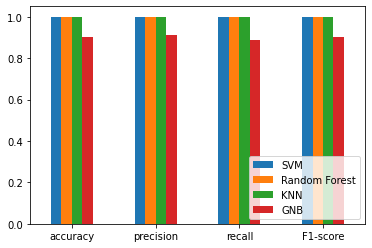

In [ ]:
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
KNN_metrics = np.array([knn_accuracy, knn_precision, knn_recall, knn_f1_score])
GNB_metrics = np.array([GNB_accuracy, GNB_precision, GNB_recall, GNB_f1_score])

print("SVM Metrics:",SVM_metrics)
print("RF:",RF_metrics)
print("KNN Metrics:",KNN_metrics)
print("GNB Metrics:",GNB_metrics)

index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'KNN': KNN_metrics, 'GNB': GNB_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

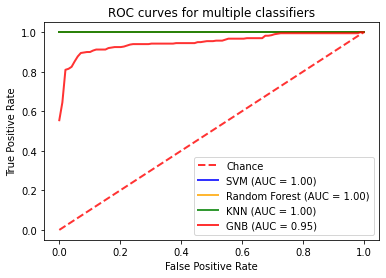

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(mean_fpr, SVM_tpr[0,:], lw=2, color='blue', label='SVM (AUC = %0.2f)' % (SVM_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, knn_tpr[0,:], lw=2, color='green', label='KNN (AUC = %0.2f)' % (knn_auc),alpha=0.8)
plt.plot(mean_fpr, GNB_tpr[0,:], lw=2, color='red', label='GNB (AUC = %0.2f)' % (GNB_auc),alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

## **Train a Final Model**

### **Discussion on Final Model**

The final model we chose was **SVM**.
KNN, SVM and Random Forest all perform very well on this dataset with high recall. We chose SVM to train a final model on the whole dataset. T

The decision to choose SVM was based on metrics. The decision was between SVM and KNN and was random. KNN and SVM were equal on metrics on this dataset. 

GNB did not perform as well other classifiers on this dataset. 

In [ ]:
def transform(dict):
    return {key.replace('svm__','') :  value for key, value in dict.items()}

pipe = make_pipeline(preprocess_pipeline, svm.SVC(**transform(SVM_best_params)))

final_model =pipe.fit(df,df['class'])

In [ ]:
filename = 'mushroom_classification_final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))